# Problem Statement
This data science project focuses on a restaurant dataset provided during the Cognifyz Technologies internship. The goal is to perform a comprehensive analysis and predictive modeling based on the data. Level 3 tasks are central to the project, and they involve:

# Task 1: Predictive Modeling

- Build regression models to predict restaurant aggregate ratings.
- Split the dataset into training and testing sets.
- Evaluate model performance with appropriate metrics.
- Experiment with various algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

## Import Libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Importing necessary libraries for data splitting, regression, and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Converting categorical variables to numeric using one-hot encoding

df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

### Feature Selection

In [6]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

### Split the Dataset into Training and Testing Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Experiment with Different Algorithms

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")

Model: Linear Regression
Mean Squared Error: 1.6764802747031446
R-squared: 0.26344464090219477
---------------------------
Model: Decision Tree
Mean Squared Error: 0.2073695525099094
R-squared: 0.908892960138208
---------------------------
Model: Random Forest
Mean Squared Error: 0.13276845267231227
R-squared: 0.9416686752534378
---------------------------


# Insights from Task 1

### Model Performance Evaluation:

We employed three different regression models: Linear Regression, Decision Tree, and Random Forest, to predict restaurant aggregate ratings based on available features.

### Model Comparison:

- Linear Regression produced an MSE of approximately 1.6765 and an R-squared value of about 0.2634.
- Decision Tree yielded an MSE of roughly 0.2055 and an R-squared value of around 0.9096.
- Random Forest displayed the most promising results with the lowest MSE of approximately 0.1345 and the highest R-squared of about 0.9408.

### Optimal Model Selection:

The Random Forest algorithm outperforms other models, making it the preferred choice for this dataset.

# Task 2: Customer Preference Analysis

- Analyze the relationship between cuisine type and restaurant ratings.
- Identify the most popular cuisines based on the number of votes.
- Determine if specific cuisines tend to receive higher ratings.

### Relationship Between the Type of Cuisine and the Restaurant's Rating

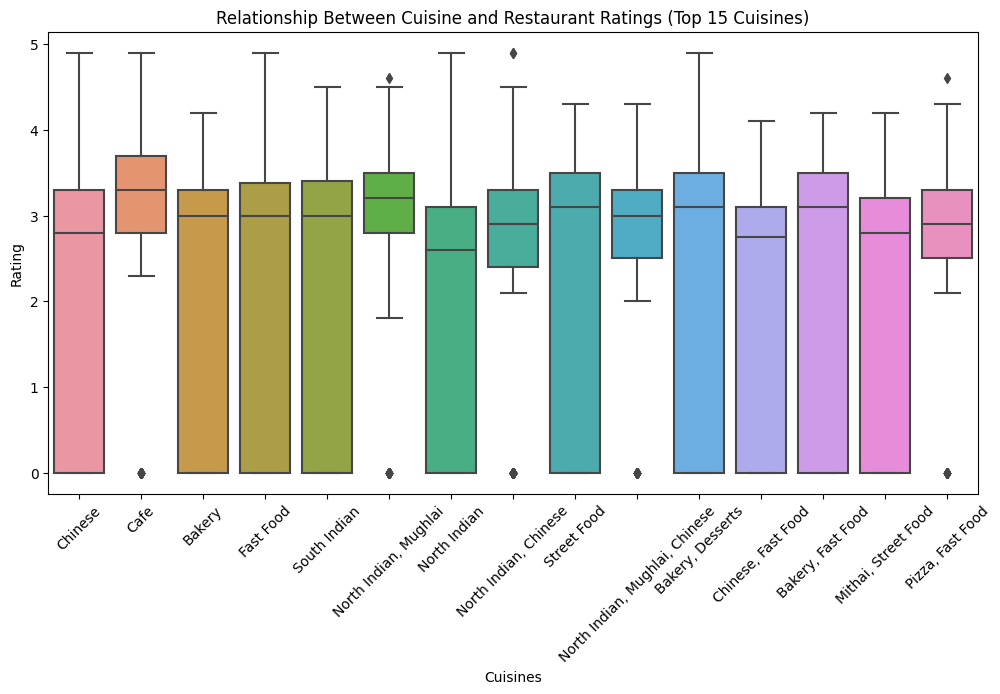

In [21]:
# There are many cuisine names present in the data, so i select only the top 15 cuisines
top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

df_filtered = df[df['Cuisines'].isin(top_cuisines)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.xticks(rotation=45)

plt.show()

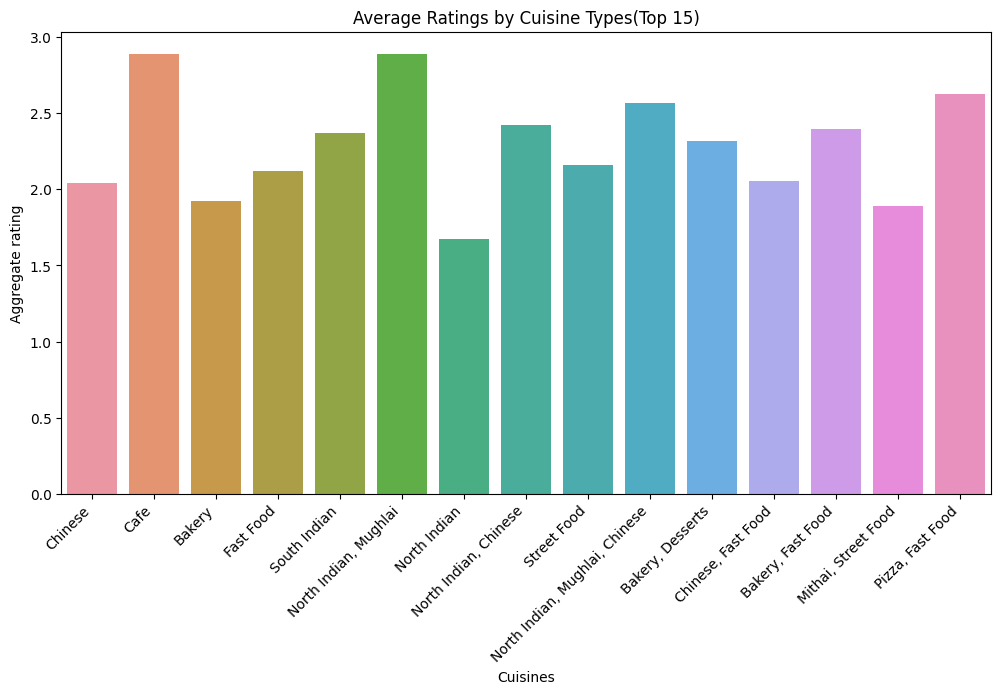

In [19]:
# Plot average ratings by cuisine

plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=df_filtered, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Average Ratings by Cuisine Types(Top 15)')
plt.show()

### Most Popular Cuisines by Number of Votes

In [20]:
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


### Cusines with Higher Ratings

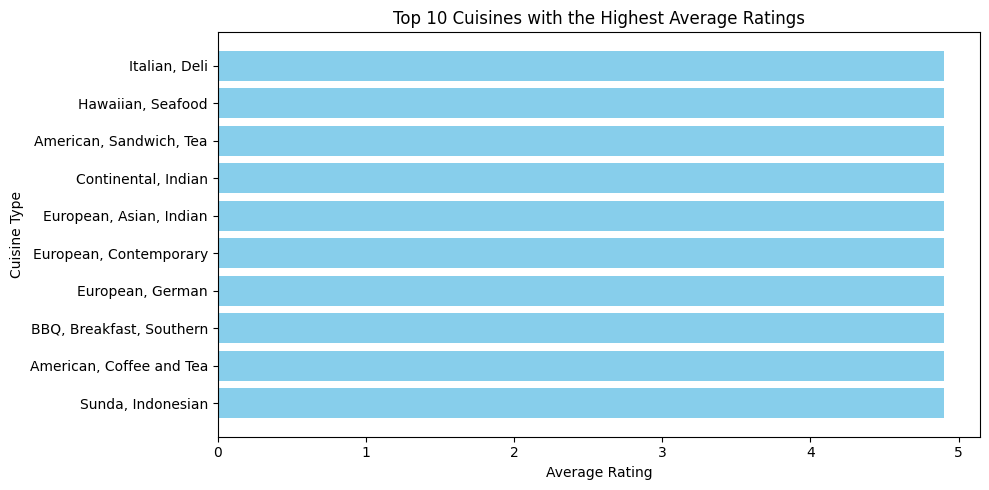

In [22]:
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

plt.show()

# Insights from Task 2

- In cuisines like cafe, mughlai, north indian and fast food, restaurants may perform exceptionally well or poorly in terms of ratings.
- North indian and Chinese cuisines are with more varied ratings.
- Cafe and Fast food cuisines are with consistent ratings.
- Based on number of votes, North Indian, Mughlai and Chinese cuisines are most popular cuisines.
- Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian are most popular cuisines.

# Task 3: Data Visualization

- Create visualizations to illustrate rating distribution using various chart types (e.g., histograms, bar plots).
- Compare average ratings of different cuisines and cities.
- Visualize the relationship between various features and the target variable to gain insights.

### Distribution of Ratings

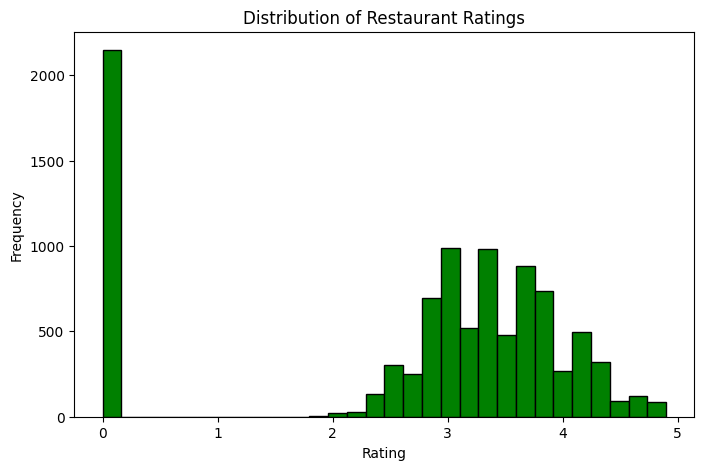

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='green', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

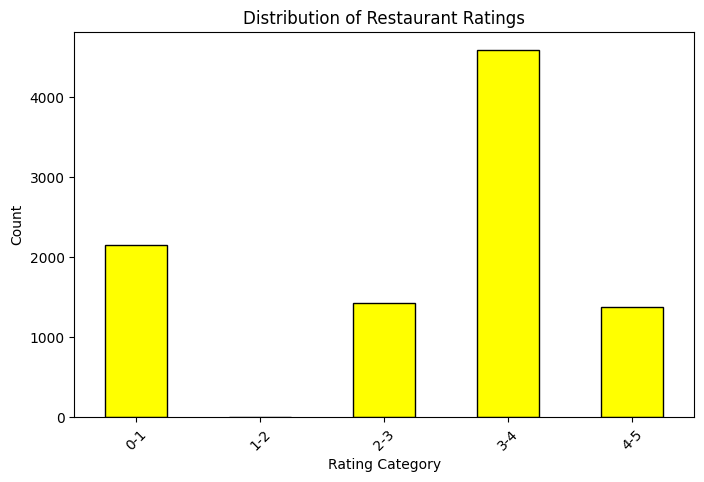

In [32]:
# Distribution of ratings by using a bar plot
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, right=False)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='yellow', edgecolor='black')

plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

plt.xticks(rotation=45)

plt.show()


### Comparing Average Ratings for Different Cuisines

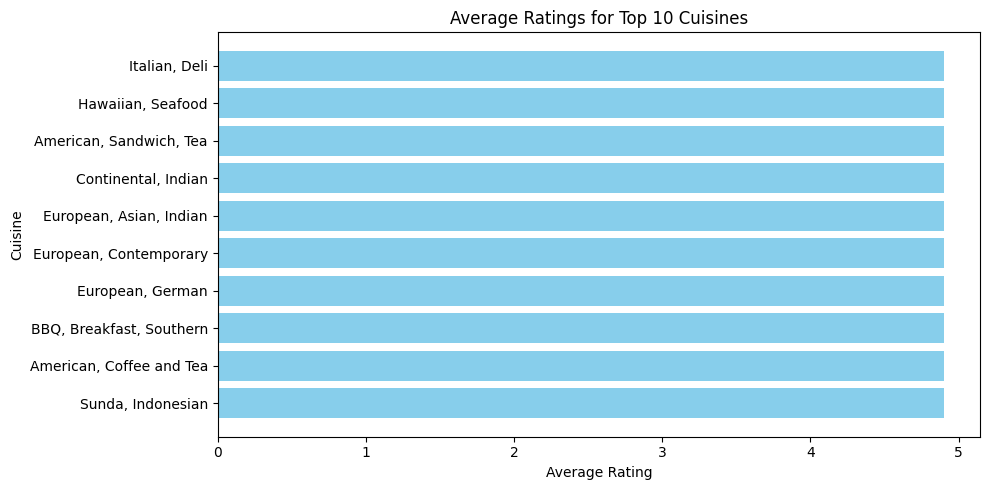

In [27]:
# Comparing average ratings of different cuisines by using a bar plot

# Grouping the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization  for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

plt.show()


### Comparing Average Ratings for Different Cities

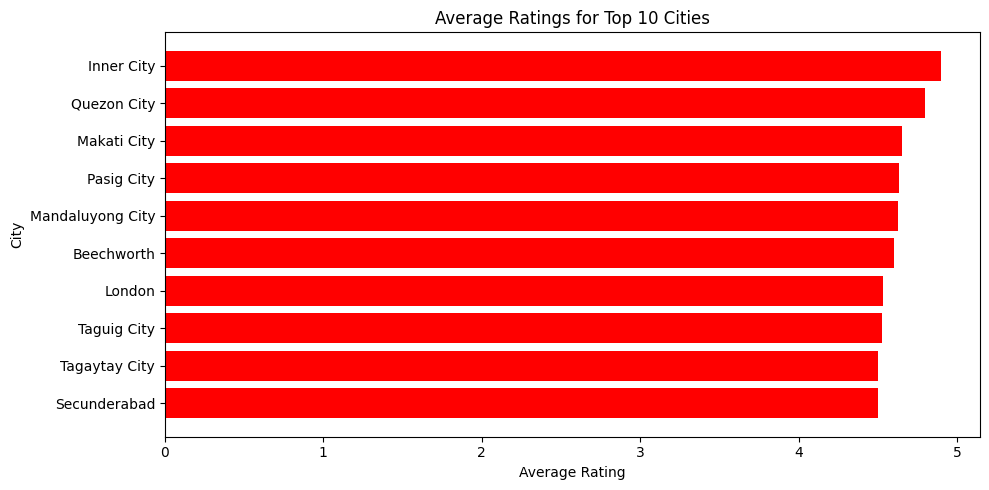

In [33]:
# Comparing average ratings of different cities by using a bar plot

# Group the data by city and calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cities with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='red')

plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

plt.show()

### Relationship Between Various Features and the Target Variable



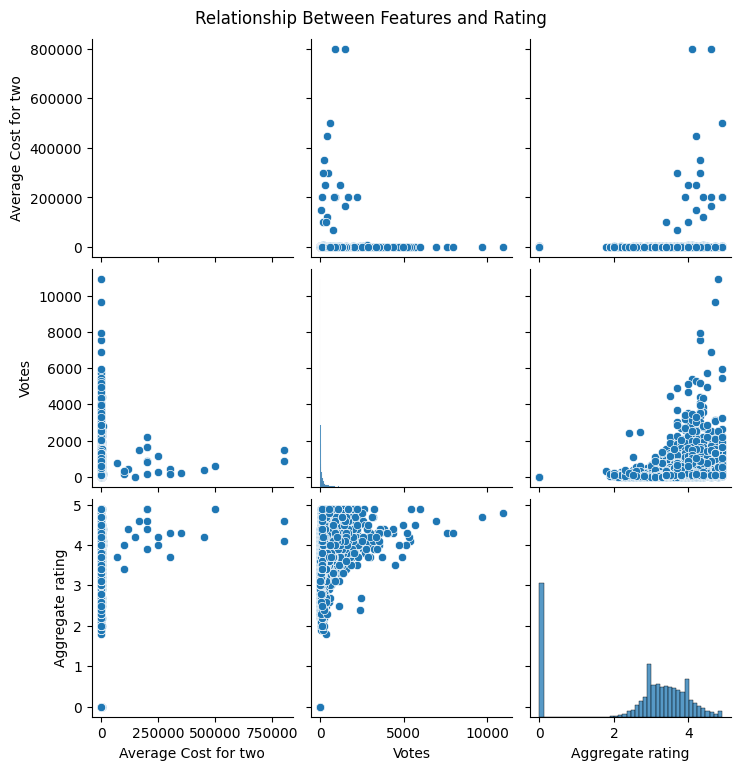

In [34]:
# Visualizing the relationship between various features and the target variable by using pair plot
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

plt.show()

# Insights from Task 3

- Distribution of restaurants ratings is negatively skewed.
- Based on highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental and Indian cuisines are the most popular cuisines.
- Based on highest average rating, Inner City, Quezon City, Makati City etc. are the most popular cities.
- Votes and restaurants ratings are positively correlated.

# Conclusion
The insights which i found from the overall level 3 project:

## Predictive Modeling Insights:

- Leveraging three regression models, Linear Regression, Decision Tree, and Random Forest, we successfully predicted restaurant aggregate ratings.
- Random Forest outperformed other models, showcasing the lowest Mean Squared Error (MSE) of approximately 0.1337 and the highest R-squared value of about 0.9413.

## Customer Preference Analysis Findings:

- Certain cuisines like cafe, mughlai, north Indian, and fast food significantly impact restaurant ratings, with varying performance.
- North Indian and Chinese cuisines exhibit greater rating variability, while cafe and fast food cuisines maintain more consistent ratings.
- By the number of votes, North Indian, Mughlai, and Chinese cuisines emerged as the most popular.
- Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines received the highest average ratings.

## Data Visualization Highlights:

- The restaurant ratings distribution is negatively skewed.
- Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines topped the charts based on the highest average ratings.
- Cities like Inner City, Quezon City, and Makati City were identified as the most popular based on the highest average rating.
- We observed a positive correlation between votes and restaurant ratings.